# Урок 4. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [1]:
from sklearn.metrics import precision_score, f1_score

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score


X = pd.read_csv('titanic/titanic_features.csv', index_col='Unnamed: 0')
y = pd.read_csv('titanic/titanic_target.csv', index_col='Unnamed: 0')['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(x_train, y_train)
knn_prediction = knn_model.predict(x_test)

knn_recall = recall_score(y_test, knn_prediction)
knn_precision = precision_score(y_test, knn_prediction)

print(f'Recall knn модели: {knn_recall}\t Precision knn модели: {knn_precision}')

Recall knn модели: 0.4891304347826087	 Precision knn модели: 0.6818181818181818


$F1-мера = 2*\frac{0.6818181818181818 * 0.4891304347826087}{0.6818181818181818 + 0.4891304347826087} = 0.5696202531645569$

In [3]:
2 * 0.6818181818181818 * 0.4891304347826087 / (0.6818181818181818 + 0.4891304347826087)

0.5696202531645569

In [4]:
import numpy as np


knn_f1_score = f1_score(y_test, knn_prediction)
knn_p_r_mean = np.mean([knn_recall, knn_precision])
print(f'F1-мера knn модели: {knn_f1_score}\t Среднее арифметическое метрик recall и precision knn модели: {knn_p_r_mean}')

F1-мера knn модели: 0.5696202531645569	 Среднее арифметическое метрик recall и precision knn модели: 0.5854743083003953


F1-мера и среднее арифметическое метрик precision и recall knn модели отличаются незначительно.

В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [5]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


nbc = GaussianNB()
nbc_model = nbc.fit(x_train, y_train)
nbc_prediction = nbc_model.predict(x_test)

dtc = DecisionTreeClassifier(random_state=17)
dtc_model = dtc.fit(x_train, y_train)
dtc_prediction = dtc_model.predict(x_test)

lreg = LogisticRegression(random_state=17)
lreg_model = lreg.fit(x_train, y_train)
lreg_prediction = lreg_model.predict(x_test)


model_list = ['knn_model', 'nbc_model', 'dtc_model', 'lreg_model']
for i, prediction in enumerate([knn_prediction, nbc_prediction, dtc_prediction, lreg_prediction]):
    print(model_list[i])
    precision_recall_fscore_support(y_test, prediction)
    print(classification_report(y_test, prediction))
    print('------------------------------------------------------')




knn_model
              precision    recall  f1-score   support

         0.0       0.70      0.84      0.76       131
         1.0       0.68      0.49      0.57        92

    accuracy                           0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223

------------------------------------------------------
nbc_model
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83       131
         1.0       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

------------------------------------------------------
dtc_model
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       131
         1.0       0.78      0.72      0.75        92

    accuracy                           0.8

Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV

In [15]:
skf = StratifiedKFold(n_splits = 5, random_state=17, shuffle=True)
skf_set = skf.get_n_splits(X, y)

interval = np.logspace(start=-1, stop=2, num=500)

lrcv_model = LogisticRegressionCV(Cs=interval, cv=skf_set, scoring='roc_auc', random_state=17).fit(x_train, y_train)


C:\Users\larin\anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\larin\anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [16]:
import matplotlib.pyplot as plt

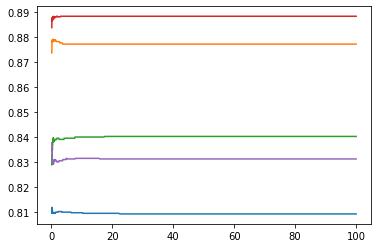

In [92]:
for i in range(5):
    plt.plot(interval, lrcv_model.scores_[1.0][i])
plt.show()

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

TypeError: 'tuple' object is not callable

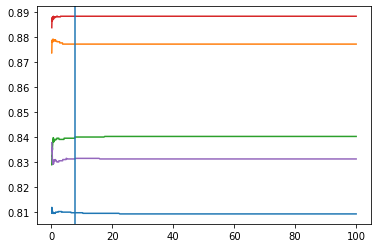

In [93]:
best_c = float(lrcv_model.C_)
best_c_index = list(interval).index(best_c)

for i in range(5):
    plt.plot(interval, lrcv_model.scores_[1.0][i])
plt.axvline(best_c)
plt.xlim(interval[best_c_index-8], interval[best_c_index+8])
#plt.xlim(interval[best_c_index-8:best_c_index+8])

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

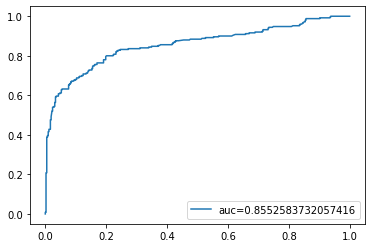

In [ ]:
probas = logit_search.fit(x_train, y_train).predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

In [ ]:
### YOUR CODE HERE ###

